In [3]:
### 지니 지수

1 - (10/16)**2 - (6/16)**2

0.46875

In [17]:
import sklearn

from sklearn.datasets import load_wine
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 

dt_clf = DecisionTreeClassifier()

wine = load_wine()
X_train, X_test, y_train, y_test = train_test_split(
wine.data
, 
wine.target
)
dt_clf.fit(X_train, y_train) 

DecisionTreeClassifier()

In [82]:
## 197p
n = []
v = []

for name, value in zip(wine.feature_names, dt_clf.feature_importances_):
    n.append(name)
    v.append(value)

name_df = pd.DataFrame(n, columns = ['name']) 
value_df = pd.DataFrame(v, columns = ['value'])

df = pd.concat([name_df, value_df], axis = 1)


,name,value
0,alcohol,0.022196
1,malic_acid,0.000000
2,ash,0.000000
3,alcalinity_of_ash,0.059839
4,magnesium,0.000000
5,total_phenols,0.000000
6,flavanoids,0.043827
7,nonflavanoid_phenols,0.000000
8,proanthocyanins,0.000000
9,color_intensity,0.062213


In [45]:
pd.DataFrame(dt_clf.feature_importances_, index = wine.feature_names).sort_values(by=0,ascending=False) 

,0
proline,0.414771
od280/od315_of_diluted_wines,0.374982
color_intensity,0.062213
alcalinity_of_ash,0.059839
flavanoids,0.043827
alcohol,0.022196
hue,0.022172
malic_acid,0.000000
ash,0.000000
magnesium,0.000000


In [18]:
dt_clf.feature_importances_

array([0.02219567, 0.        , 0.        , 0.05983915, 0.        ,
       0.        , 0.04382687, 0.        , 0.        , 0.06221302,
       0.02217221, 0.37498242, 0.41477066])

# 수업

## 앙상블(Ensemble Learning)

- 앙상블 학습을 통한 분류는 여러 개의 분류기를 생성하고 그 예측을 결합함으로써 보다 정확한 최종 예측을 도출하는 기법임

- 대부분의 정형 데이터 분류 시 앙상블이 뛰어난 성능을 나타내고 있음
- 앙상블 알고리즘의 대표적인 랜덤 포레스트와 그래디언트 부스팅이 많이 사용됨
- XGBoodt, LightGBM, Stacking

- 앙상블 학습의 유형은 보팅(Voting), 배깅(Bagging), 부스팅(Boosting)으로 나눌 수 있음
- 이 외에도 다양한 앙상블 방법이 있음

- 보팅 : 일반적으로 서로 다른 알고리즘을 가진 분류기를 결합하는 것
- 배깅 : 각각의 분류기가 모두 같은 유형의 알고리즘 기반이지만, 데이터 샘플링을 다르게 가져가면서 학습을 수행
- 대표적인 배깅 방식이 랜덤 포레스트임

### 보팅 유형 - 하드 보팅(Hard Voting)과 소프트 보팅(Soft Voting)

- 하드 보팅을 이용한 분류는 다수결 원칙과 비슷함
- 예측한 결괏값들 중 다수의 분류기가 결정한 예측값을 최종 보팅 결괏값으로 설정하는 것

- 소프트 보팅은 분류기들의 레이블 값 결정 확률을 모두 더하고 이를 평균해서 이들 중 확률이 가장 높은 렝블 값을 최종 보팅 결괏값으로 선정
- 일반적으로 소프트 보팅 방법으로 적용됨

- 일반적으로 하드 보팅보다는 소프트 보팅이 예측 성능이 더 좋아서 많이 사용됨

### 보팅 분류기(Voting Classifier)

In [83]:
import pandas as pd

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer = load_breast_cancer()

data_df = pd.DataFrame(cancer.data, columns = cancer.feature_names)
data_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [85]:
# 개별 모델은 로지스틱 회귀와 KNN임
lr_clf = LogisticRegression(solver = 'liblinear')
knn_clf = KNeighborsClassifier(n_neighbors = 8)

# 개별 모델을 소프트 보팅 기반의 앙상블 모델로 구현한 분류기
vo_clf = VotingClassifier(estimators=[('LR', lr_clf), ('KNN', knn_clf)], voting = 'soft', verbose = 3)

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                   test_size = .2, random_state = 156)

# VotingClassifier 학습/예측/평가
vo_clf.fit(X_train, y_train)

pred = vo_clf.predict(X_test)
print(f'Voting 분류기 정확도 : {accuracy_score(y_test, pred)}')

# 개별 모델의 학습/예측/평가
classifiers = [lr_clf, knn_clf]
for classifier in classifiers:
    classifier.fit(X_train, y_train)
    pred = classifier.predict(X_test)
    class_name = classifier.__class__.__name__
    print(f'{class_name} 정확도 : {accuracy_score(y_test, pred)}')

[Voting] ....................... (1 of 2) Processing LR, total=   0.0s
[Voting] ...................... (2 of 2) Processing KNN, total=   0.0s
Voting 분류기 정확도 : 0.956140350877193
LogisticRegression 정확도 : 0.9473684210526315
KNeighborsClassifier 정확도 : 0.9385964912280702


- 보팅 분류기가 정확도가 조금 높게 나옴
- 보팅으로 여러 개의 기반 분류기를 결합한다고 해서 무조건 기반 분류기보다 예측 성능이 향상되지는 않음
- 데이터의 특성과 분포 등 다양한 요건에 따라 오히려 기반 분류기 중 가장 좋은 분류기의 성능이 보팅했을 때보다 나을 수도 있음

- 보팅, 배깅, 부스팅 등의 앙상블 방법은 전반적으로 다른 단일 ML 알고리즘보다 뛰어난 예측 성능을 가지는 경우가 많음
- 고정된 데이터 세트에서 단일 ML 알고리즘이 뛰어난 성능을 발휘하더라고 현실 세계는 다양한 변수와 예측이 어려운 규칙으로 구성돼있음
- 다양한 관점을 가진 알고리즘이 서로 결합해 더 나은 성능을 실제 환경에서 끌어낼 수 있음

- ML 모델의 성능은 이렇게 다양한 테스트 데이터에 의해 검증되므로 어떻게 높은 유연성을 가지고 현실에 대처할 수 있는가가 중요한 ML 모델의 평가요소가 됨
- 이런 관점에서 편향-분산 트레이드오프는 ML 모델이 극복해야 할 중요 과제임
- 보팅과 스태킹 등은 서로 다른 알고리즘을 기반으로 하고 있지만, 
- 배깅과 부스팅은 대부분 결정 트리 알고리즘을 기반으로 함
- 결정 트리 알고리즘은 쉽고 직관적인 분류 기준을 가지고 있지만 정확한 예측을 위해 학습 데이터의 예외 상황에 집착한 나머지 오히려 과적합이 발생해 실제 테스트 데이터에서 예측 성능이 떨어지는 현상 발생하기 쉬움


- 하지만 앙상블 학습에서는 이 같은 결정 트리 알고리즘의 단점을 수십~수천 개의 매우 많은 분류기를 결합해 다양한 상황을 학습하게 함으로써 극봅하고 있음
- 결정 트리 알고리즘의 장점은 그대로 취하고 단점은 보완하면서 편향-분산 트레이드오프의 효과를 극대화할 수 있음

## 랜덤 포레스트

### 배깅
- 같은 알고리즘으로 여러 개의 분류기를 만들어서 보팅으로 최종 결정하는 알고리즘
- 대표적인 알고리즘 : 랜덤 포레스트
- 랜덤 포레스트는 앙상블 알고리즘 중 비교적 빠른 수행 속도를 가지고 있으며, 다양한 영역에서 높은 예측 성능을 보이고 있음

- 랜덤 포레스트는 여러 개의 결정 트리 분류기가 전체 데이터에서 배깅 방식으로 각자의 데이터를 샘플링해 개별적으로 학습을 수행한 뒤 최종적으로 모든 분류기가 보팅을 통해 예측 결정함

- 랜덤 포레스트는 개별적인 분류기의 기반 알고리즘은 결정 트리임
- 개별 트리가 학습하는 데이터 세트는 전체 데이터에서 일부가 중첩되게 샘플링 된 데이터 세트임
- 이렇게 여러 개의 데이터 세트를 중첩되게 분리하는 것을 '부트스트래핑(bootstrapping)' 분할 방식이라고 함

- 랜덤 포레스트의 서브세트(Subset) 데이터는 이러한 부트스트래핑으로 데이터가 임의로 만들어짐
- 서브세트의 데이터 건수는 전체 데이터 건수와 동일하지만, 개별 데이터가 중헙되어 만들어짐

In [88]:
## 원본 피터명에 _1 또는 _2 추가로 부여해 새로운 피처명을 가지고는 DataFrame 반환

def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(),
                                  columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1]) 
                                                                                         if x[1] >0 else x[0],  axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df 

In [89]:
import pandas as pd

def get_human_dataset( ):
    
    # 각 데이터 파일들은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당.
    feature_name_df = pd.read_csv('./data/human_activity/features.txt',sep='\s+',
                        header=None,names=['column_index','column_name'])
    
    # 중복된 피처명을 수정하는 get_new_feature_name_df()를 이용, 신규 피처명 DataFrame생성. 
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    
    # DataFrame에 피처명을 컬럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()
    
    # 학습 피처 데이터 셋과 테스트 피처 데이터을 DataFrame으로 로딩. 컬럼명은 feature_name 적용
    X_train = pd.read_csv('./data/human_activity/train/X_train.txt',sep='\s+', names=feature_name )
    X_test = pd.read_csv('./data/human_activity/test/X_test.txt',sep='\s+', names=feature_name)
    
    # 학습 레이블과 테스트 레이블 데이터을 DataFrame으로 로딩하고 컬럼명은 action으로 부여
    y_train = pd.read_csv('./data/human_activity/train/y_train.txt',sep='\s+',header=None,names=['action'])
    y_test = pd.read_csv('./data/human_activity/test/y_test.txt',sep='\s+',header=None,names=['action'])
    
    # 로드된 학습/테스트용 DataFrame을 모두 반환 
    return X_train, X_test, y_train, y_test


X_train, X_test, y_train, y_test = get_human_dataset() 

In [90]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# 결정 트리에서 사용한 dataset 이용해 학습/테스트용 DataFrame 전환
X_train, X_test, y_train, y_test = get_human_dataset()

# 랜덤 포레스트 학습 및 별도의 테스트 세트로 예측 성능 평가
rf_clf = RandomForestClassifier(random_state = 0, max_depth = 8)
rf_clf.fit(X_train, y_train)

pred = rf_clf.predict(X_test)

accuracy = accuracy_score(y_test, pred)
print(f'랜덤 포레스트 정확도 : {accuracy}')

랜덤 포레스트 정확도 : 0.9195792331184255


### 랜덤 포레스트 하이퍼 파라미터 및 튜닝

- 트리 기반의 앙상블 알고리즘의 단점 : 하이퍼 파라미터가 너무 많고 그로 인해서 튜닝을 위한 시간 소모가 많음

- 많은 시간을 소모했음에도 튜닝 후 예측 성능이 크게 향상되는 경우가 많지 않음

#### 랜덤 포레스트 파라미터

- n_estimators : 랜덤 포레스트에서 결정 트리의 개수를 지정(default = 10), 많이 설정할 수록 좋은 성능 기대할 수 있으나 계속 증가시킨다고 성능이 무조건 향상되는 것은 아님 / 늘릴수록 수행 시간 오래 걸림

- max_features : 결정 트리에 사용된 max_features 파라미터와 같음 / 랜덤 포레스트의 트리를 분할하는 피처를 참조할 때 전페 피처가 아니라 sqrt 만큼 참조함

- max_depth나 min_samples_leaf, min_samples_split와 같이 결정 트리에서 과적합을 개선하기 위해 사용되는 파라미터가 랜덤 포레스트에도 똑같이 적용될 수 있음

In [95]:
rf_clf = RandomForestClassifier(n_estimators = 200, random_state = 0, n_jobs = -1,
                               min_samples_split = 3)
rf_clf.fit(X_train, y_train)

pred = rf_clf.predict(X_test)

accuracy = accuracy_score(y_test, pred)
print(f'랜덤 포레스트 정확도 : {accuracy}')

랜덤 포레스트 정확도 : 0.9267051238547676


In [99]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth' : [8, 16, 24],
    'min_samples_leaf' : [1, 6, 12],
    'min_samples_split' : [2, 8, 6]
}

# RandomForesClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(n_estimators = 100, random_state = 0, n_jobs = -1)

grid_cv = GridSearchCV(rf_clf, param_grid = params, cv = 2, n_jobs = -1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터 : \n', grid_cv.best_params_)
print(f'최고 예측 정확도 : {grid_cv.best_score_}')

최적 하이퍼 파라미터 : 
 {'max_depth': 16, 'min_samples_leaf': 6, 'min_samples_split': 2}
최고 예측 정확도 : 0.9164853101196953


In [101]:
rf_clf1 = RandomForestClassifier(n_estimators = 100, random_state = 0, min_samples_split = 2,
                                 min_samples_leaf = 6, max_depth = 16, n_jobs = -1)
rf_clf1.fit(X_train, y_train)
pred = rf_clf1.predict(X_test)
accuracy_score(y_test, pred)

0.9260264675941635

()

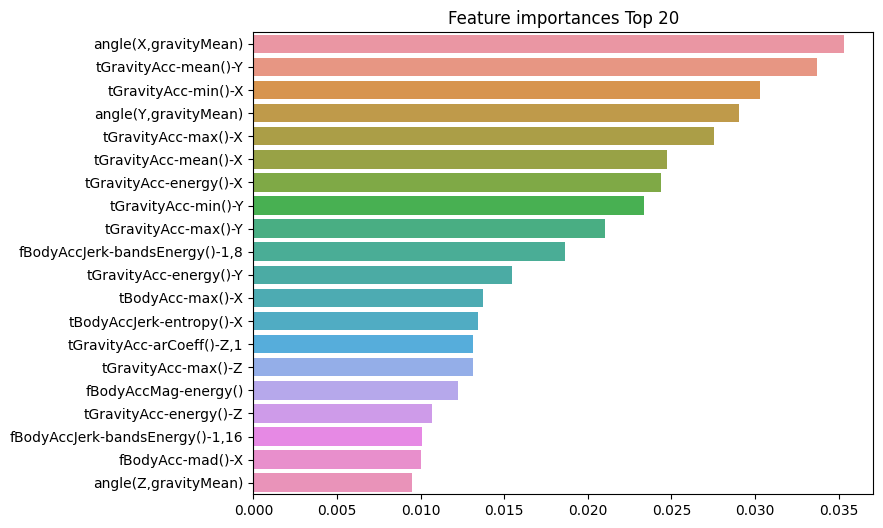

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=X_train.columns  )
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show
() 

### GBM(Gradient Boosting Machine)

- 부스팅 알고리즘은 여러 개의 약한 학습기를 순차적으로 학습-예측하면서 잘못 예측한 데이터에 가중치 부여를 통해 오류를 개선해 나가면서 학습하는 방식임
- 부스팅의 대표적인 구현은 AdaBoost(Adaptive Boosting)와 그래디언트 부스트가 있음

- 에이다 부스트 : 오류 데이터에 가중치를 부여하면서 부스팅을 수행하는 대표적인 알고리즘

    1. 분류
    2. 잘못 분류된 오류 데이터에 대해서 가중치 값을 부여(다음 약한 학습기가 더 잘 분류할 수 있게 크기가 커짐)
    3. 분류 후 또 다시 오류 데이터에 가중치를 부여
    4. 약한 학습기가 순차적으로 오류 값에 대해 가중치를 부여한 예측 결정 기준을 모두 결합해 예측을 수행함

- GBM도 에이다부스트와 유사하나, 가중치 업데이트를 경사 하강법(Gradient Descent)을 이용하는 것이 큰 차이임
- 오류 값은 실제 - 예측값임

- 분류의 실제 값을 y
- 피처를 x1, x2, x3, ... xn
- 피처에 기반한 예측 함수 F(x) 함수라고 하면

- 오류식은 h(x) = y - F(x)임
- 이 오류식을 최소화하는 방향성을 가지고 반복적으로 가중치 값을 업데이트 하는 것이 경사 하강법임

- 경사 하강법 : 반복 수행을 통해 오류를 최소화할 수 있도록 가중치의 업데잍 값을 도출하는 기법

In [103]:
## GBM
from sklearn.ensemble import GradientBoostingClassifier
import time
import warnings
warnings.filterwarnings('ignore')

X_train, X_test, y_train, y_test = get_human_dataset()

# GBM 수행 시간 측정 위함. 시작 시간 설정
start_time = time.time()

gb_clf = GradientBoostingClassifier(random_state = 0)
gb_clf.fit(X_train, y_train)

gb_pred = gb_clf.predict(X_test)

gb_accuracy = accuracy_score(y_test, gb_pred)

print('GBM 정확도 : ', gb_accuracy)
print(f'GBM 수행 시간 : {time.time() - start_time} 초')

GBM 정확도 :  0.9389209365456397
GBM 수행 시간 : 677.7183587551117 초


### GBM 하이퍼 파라미터 소개

- loss : 경사 하강법에서 사용할 비용 함수를 지정함. 특별한 이유 없으면 기본값인 'deviance'를 그대로 적용함

- learning_rate : GBM이 학습을 진행할 때마다 적용하는 학습률임. Weak learner가 순차적으로 오류 값을 보정해나가는 데 적용하는 계수 (0 ~ 1 사이) - 너무 작은 값 적용 시 최소 오류 값을 찾아 예측 성능이 높아질 가능성 있음

- n_estimators : weak learner의 개수(기본값 100) - learning_rate와 상호 보완적으로 조합해 사용

- subsample : weak learner가 학습에 사용하는 데이터의 샘플링 비율 (기본값 1, 이는 전체 학습 데이터를 기반으로 학습한다는 의미임) - 과적합 염려 시, subsample을 1보다 작은 값으로 설정

## XGBoost

- 분류에 있어서 일반적으로 다른 머신러닝보다 뛰어난 예측 성능을 나타냄
- GBM 기반이나 GBM의 단점이 느린 수행 시간 및 과저합 규제 부재 등의 문제를 해결해서 각광 받고있음

#### 장점
- 뛰어난 예측 성능
- GBM 대비 빠른 수행 시간
- 과적합 규제 - 자체 과적합 규제 기능이 있어 강한 내구성 가질 수 있음
- Tree Pruning(가지치기)
- 자체 내장된 교차 검증  - 반복 수행 시마다 내부적으로 학습 데이터 세트와 평가 데이터 세트에 대한 교차 검증을 수행해 최적화 된 반복 수행 횟수를 가질 수 있음
- 결손값 자체 처리

In [105]:
## XG Boost
!pip install xgboost

     -------------------------------------- 125.4/125.4 MB 2.2 MB/s eta 0:00:00


In [106]:
import xgboost as xgb
from xgboost import XGBClassifier

In [108]:
xgb.__version__

'1.6.2'

In [114]:
cancer = load_breast_cancer()

X = cancer.data
y = cancer.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 156)

X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size = .1, random_state = 156)

In [112]:
# 사이킷런 래퍼 XGBoost 클래스인 XGBClassifier 임포트
from xgboost import XGBClassifier

# Warning 메시지를 없애기 위해 eval_metric 값을 XGBClassifier 생성 인자로 입력
xgb_wrapper = XGBClassifier(n_estimators = 400, learning_rate = 0.05, 
                            max_depth = 3, eval_metric = 'logloss')

xgb_wrapper.fit(X_train, y_train, verbose = True)

w_preds = xgb_wrapper.predict(X_test)
w_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]

In [121]:
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc)) 

In [122]:
get_clf_eval(y_test, w_preds, w_pred_proba)

오차 행렬
[[34  3]
 [ 1 76]]
정확도: 0.9649, 정밀도: 0.9620, 재현율: 0.9870,    F1: 0.9744, AUC:0.9954


In [119]:
xgb_wrapper = XGBClassifier(n_estimators = 400, learning_rate = 0.05, max_depth = 3)
evals = [(X_tr, y_tr), (X_val, y_val)]
xgb_wrapper.fit(X_tr, y_tr, early_stopping_rounds = 50, eval_metric = 'logloss',
               eval_set = evals, verbose = True)

ws50_preds = xgb_wrapper.predict(X_test)
ws50_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]

[0]	validation_0-logloss:0.65016	validation_1-logloss:0.66183
[1]	validation_0-logloss:0.61131	validation_1-logloss:0.63609
[2]	validation_0-logloss:0.57563	validation_1-logloss:0.61144
[3]	validation_0-logloss:0.54310	validation_1-logloss:0.59204
[4]	validation_0-logloss:0.51323	validation_1-logloss:0.57329
[5]	validation_0-logloss:0.48447	validation_1-logloss:0.55037
[6]	validation_0-logloss:0.45796	validation_1-logloss:0.52930
[7]	validation_0-logloss:0.43436	validation_1-logloss:0.51534
[8]	validation_0-logloss:0.41150	validation_1-logloss:0.49718
[9]	validation_0-logloss:0.39027	validation_1-logloss:0.48154
[10]	validation_0-logloss:0.37128	validation_1-logloss:0.46990
[11]	validation_0-logloss:0.35254	validation_1-logloss:0.45474
[12]	validation_0-logloss:0.33528	validation_1-logloss:0.44229
[13]	validation_0-logloss:0.31892	validation_1-logloss:0.42961
[14]	validation_0-logloss:0.30439	validation_1-logloss:0.42065
[15]	validation_0-logloss:0.29000	validation_1-logloss:0.40958
[1

조기 중단 관련 파라미터
- 평가 지표가 향상될 수 있는 반복 횟수를 정의하는 early_stopping_rounds
- 조기 중단을 위한 평가 지표인 eval_metric
- 서능 평가를 수행할 데이터 세트인 eval_set

In [123]:
get_clf_eval(y_test, ws50_preds, ws50_pred_proba)

오차 행렬
[[34  3]
 [ 2 75]]
정확도: 0.9561, 정밀도: 0.9615, 재현율: 0.9740,    F1: 0.9677, AUC:0.9933


- 조기 중단값을 너무 급격하게 줄이면 예측 성능이 저하될 수 있음
- 만약 early_stopping_rounds를 10으로 하면 아직 성능이 향상될 여지가 있음에도 불구하고 10번 반복하는 동안 성능 평가지표가 향상되지 않으면 반복이 멈춰 버려서 충분한 학습이 되지 않아 예측 성능이 나빠질 수 있음

In [127]:
xgb_wrapper = XGBClassifier(n_estimators = 400, learning_rate = 0.05, max_depth = 3)
evals = [(X_tr, y_tr), (X_val, y_val)]
xgb_wrapper.fit(X_tr, y_tr, early_stopping_rounds = 10, eval_metric = 'logloss',
               eval_set = evals, verbose = True)

ws50_preds = xgb_wrapper.predict(X_test)
ws50_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]


[0]	validation_0-logloss:0.65016	validation_1-logloss:0.66183
[1]	validation_0-logloss:0.61131	validation_1-logloss:0.63609
[2]	validation_0-logloss:0.57563	validation_1-logloss:0.61144
[3]	validation_0-logloss:0.54310	validation_1-logloss:0.59204
[4]	validation_0-logloss:0.51323	validation_1-logloss:0.57329
[5]	validation_0-logloss:0.48447	validation_1-logloss:0.55037
[6]	validation_0-logloss:0.45796	validation_1-logloss:0.52930
[7]	validation_0-logloss:0.43436	validation_1-logloss:0.51534
[8]	validation_0-logloss:0.41150	validation_1-logloss:0.49718
[9]	validation_0-logloss:0.39027	validation_1-logloss:0.48154
[10]	validation_0-logloss:0.37128	validation_1-logloss:0.46990
[11]	validation_0-logloss:0.35254	validation_1-logloss:0.45474
[12]	validation_0-logloss:0.33528	validation_1-logloss:0.44229
[13]	validation_0-logloss:0.31892	validation_1-logloss:0.42961
[14]	validation_0-logloss:0.30439	validation_1-logloss:0.42065
[15]	validation_0-logloss:0.29000	validation_1-logloss:0.40958
[1

In [126]:
get_clf_eval(y_test, ws50_preds, ws50_pred_proba)

오차 행렬
[[34  3]
 [ 3 74]]
정확도: 0.9474, 정밀도: 0.9610, 재현율: 0.9610,    F1: 0.9610, AUC:0.9933
